# Identifying objects in images.
## 1st dataset to try: CIFAR 10

Starting lines and imports

In [99]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load CIFAR 10

In [298]:
c_mean_tr = np.mean(train_dataset.data)
c_sd_tr = np.std(train_dataset.data[:,:,:, 0])
transforms.Normalize((c_mean_tr),(c1_sd_tr))

Normalize(mean=120.70756512369792, std=62.993219278136884)

In [300]:
c1_mean_tst = np.mean(test_dataset.data)
c1_sd_tst = np.std(test_dataset.data)
transforms.Normalize((c1_mean_tst),(c1_sd_tst))

Normalize(mean=121.52915475260417, std=64.06097012299574)

#### Define transforms for the dataset and load

In [320]:
transform_tr = transforms.Compose([transforms.ToTensor()])
transform_tst = transforms.Compose([transforms.ToTensor()])

In [322]:
# CIFAR-10 training dataset and data loader
train_batch_size = 100

train_dataset = datasets.CIFAR10('CIFAR10', train=True, download=True, transform=transform_tr)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=train_batch_size,
                                          shuffle=True)

Files already downloaded and verified


In [325]:
# CIFAR-10 test dataset and data loader
test_batch_size = 10000

test_dataset = datasets.CIFAR10('CIFAR10', train=False, download=True, transform=transform_tst)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=test_batch_size,
                                          shuffle=True)

Files already downloaded and verified


#### Function to show individual image and associated label

In [323]:
def show_image(image_num):
    plt.imshow(train_loader.dataset.data[image_num,:,:])
    target = train_loader.dataset.targets[image_num]
    print("This image is a(n) " + str(train_loader.dataset.classes[target])+".")

This image is a(n) airplane.


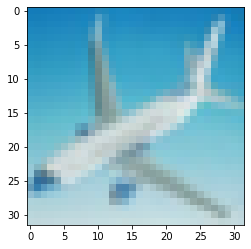

In [324]:
show_image(1701)

# Initialize settings for Neural Network

In [326]:
class Neural_Network(nn.Module):
    def __init__(self, dimensions):
        super(Neural_Network, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
        self.activ = nn.Tanh()
        
    def forward(self, x):
        x = self.pool(self.activ(self.conv1(x)))
        x = self.pool(self.activ(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = self.activ(self.fc1(x))
        x = self.activ(self.fc2(x))
        x = self.fc3(x)
        
        return x

## Function to calculate classification prediction accuracy

In [327]:
def accuracy(outputs, labels):
    prediction = outputs.max(1, keepdim=True)[1].squeeze()
    prediction_comp = torch.eq(prediction, labels)
    prediction_comp = prediction_comp.sum().numpy() / torch.numel(prediction)
    return prediction_comp * 100

In [328]:
neural_network = Neural_Network(dimensions)

In [329]:
criterion = nn.CrossEntropyLoss()
number_of_epochs = 10
step_size = 0.1
momentum_parameter = 0.7
optimiser = optim.SGD(neural_network.parameters(), lr=step_size, momentum=momentum_parameter)

running_loss = []
running_test_loss = []
running_training_accuracy = []
running_training_accuracy.append(0)
running_test_accuracy = []
running_test_accuracy.append(0)

# loop for epochs
for k in range(number_of_epochs):
    epoch_loss = 0
    training_accuracy = 0
    
    for j, (images, labels) in enumerate(train_loader):
        optimiser.zero_grad()
        outputs = neural_network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()
        
        epoch_loss += loss.item()
        training_accuracy += accuracy(outputs, labels)
    
    running_loss.append(epoch_loss/len(train_loader))
    running_training_accuracy.append(training_accuracy/len(train_loader))
    
    test_images, test_labels = iter(test_loader).next()
    test_outputs = neural_network(test_images)
    test_loss = criterion(test_outputs, test_labels).item()
    running_test_loss.append(test_loss)
    test_accuracy = accuracy(test_outputs, test_labels)
    running_test_accuracy.append(test_accuracy)
    
    if k % 1 == 0:
        print("Epoch {a}/{b} -> Tr. Loss = {c:.2f}, Tst. Loss = {d:.2f}, Tr. Acc = {e}, Tst. Acc = {f}".format(a=k, b=number_of_epochs, c=running_loss[-1], d=running_test_loss[-1], e=running_training_accuracy[-1], f=running_test_accuracy[-1]))
    
    if (len(running_test_loss) > 3) and (running_test_loss[-3] - running_test_loss[-1] < 0):
        break
        
print("Final Epoch {} -> Loss = {}".format(k, running_loss[-1]))

Epoch 0/10 -> Tr. Loss = 1.74, Tst. Loss = 1.49, Tr. Acc = 36.614, Tst. Acc = 46.23
Epoch 1/10 -> Tr. Loss = 1.41, Tst. Loss = 1.47, Tr. Acc = 49.1, Tst. Acc = 46.93
Epoch 2/10 -> Tr. Loss = 1.30, Tst. Loss = 1.29, Tr. Acc = 53.698, Tst. Acc = 53.83
Epoch 3/10 -> Tr. Loss = 1.21, Tst. Loss = 1.24, Tr. Acc = 56.864, Tst. Acc = 56.15
Epoch 4/10 -> Tr. Loss = 1.16, Tst. Loss = 1.24, Tr. Acc = 59.216, Tst. Acc = 56.58
Epoch 5/10 -> Tr. Loss = 1.11, Tst. Loss = 1.19, Tr. Acc = 60.814, Tst. Acc = 58.440000000000005
Epoch 6/10 -> Tr. Loss = 1.06, Tst. Loss = 1.20, Tr. Acc = 62.622, Tst. Acc = 57.87
Epoch 7/10 -> Tr. Loss = 1.02, Tst. Loss = 1.25, Tr. Acc = 64.198, Tst. Acc = 56.36
Final Epoch 7 -> Loss = 1.0178268554210663


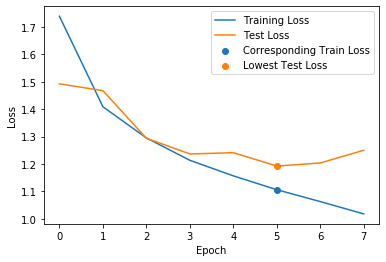

In [343]:
plt.plot(running_loss, label="Training Loss")
plt.plot(running_test_loss, label="Test Loss")
plt.scatter(5, running_loss[5], label="Corresponding Train Loss")
plt.scatter(5, running_test_loss[5], label="Lowest Test Loss") 
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()